In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('F:\Rushy\dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

F:\Rushy\dataset\broadleaf\1.tif
F:\Rushy\dataset\broadleaf\10.tif
F:\Rushy\dataset\broadleaf\1006.tif
F:\Rushy\dataset\broadleaf\1007.tif
F:\Rushy\dataset\broadleaf\1009.tif
F:\Rushy\dataset\broadleaf\1012.tif
F:\Rushy\dataset\broadleaf\1019.tif
F:\Rushy\dataset\broadleaf\102.tif
F:\Rushy\dataset\broadleaf\1020.tif
F:\Rushy\dataset\broadleaf\103.tif
F:\Rushy\dataset\broadleaf\1031.tif
F:\Rushy\dataset\broadleaf\1032.tif
F:\Rushy\dataset\broadleaf\1034.tif
F:\Rushy\dataset\broadleaf\1035.tif
F:\Rushy\dataset\broadleaf\1036.tif
F:\Rushy\dataset\broadleaf\1037.tif
F:\Rushy\dataset\broadleaf\104.tif
F:\Rushy\dataset\broadleaf\1041.tif
F:\Rushy\dataset\broadleaf\1043.tif
F:\Rushy\dataset\broadleaf\1044.tif
F:\Rushy\dataset\broadleaf\1046.tif
F:\Rushy\dataset\broadleaf\1050.tif
F:\Rushy\dataset\broadleaf\1055.tif
F:\Rushy\dataset\broadleaf\1061.tif
F:\Rushy\dataset\broadleaf\1062.tif
F:\Rushy\dataset\broadleaf\1065.tif
F:\Rushy\dataset\broadleaf\1066.tif
F:\Rushy\dataset\broadleaf\1072.tif


In [4]:
import skimage.io as skio
imstack1=skio.imread("F:\\Rushy\\dataset\\broadleaf\\1.tif")
imstack1.shape

(187, 201, 3)

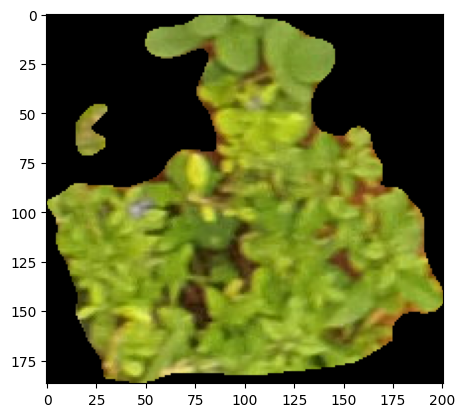

In [ ]:
import matplotlib.pyplot as plt
import os
plt.imshow(imstack1)
plt.show()

In [5]:
os.listdir('F:\\Rushy\\dataset\\')

['broadleaf', 'grass', 'soil', 'soybean']

In [6]:
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

In [7]:
import numpy as np
import pandas as pd
import os
from matplotlib import image
from PIL import Image
def load_imgs(path):
    folders=os.listdir(path)
    data = []
    label = []
    # folders.remove('dataset')
    for i in folders:
        images=os.listdir(path+'/'+i)
        for j in images:
            im=Image.open(path+'/'+i+'/'+j).convert('RGB')
            im=im.resize((200,200))
            ar=np.array(im)
            data.append(ar)
            label.append(i)
    t=pd.factorize(np.array(label))
    return np.array(data),label

In [8]:
x, y = load_imgs("F:\Rushy\dataset")
x.shape
#y.shape

(1807, 200, 200, 3)

In [9]:
target=pd.Series(y,dtype='category')
target

0       broadleaf
1       broadleaf
2       broadleaf
3       broadleaf
4       broadleaf
          ...    
1802      soybean
1803      soybean
1804      soybean
1805      soybean
1806      soybean
Length: 1807, dtype: category
Categories (4, object): ['broadleaf', 'grass', 'soil', 'soybean']

In [10]:
t=target.cat.codes

In [11]:
dicti=dict(enumerate(target.cat.categories))
print(dicti)

{0: 'broadleaf', 1: 'grass', 2: 'soil', 3: 'soybean'}


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,t,test_size=0.2,random_state=100)
x_train.shape

(1445, 200, 200, 3)

In [13]:
img_size = (200, 200)
input_shape = (img_size[0], img_size[1], 3)

In [14]:
from tensorflow.keras.layers import MaxPooling2D, Flatten, Conv2D, Dense , UpSampling2D
from tensorflow.keras.models import Sequential

model_1 = Sequential()
model_1.add(Conv2D(20,kernel_size=5,activation='relu',input_shape=input_shape))
model_1.add(Conv2D(20,kernel_size=5,activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(UpSampling2D())
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(UpSampling2D())
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(Conv2D(4,kernel_size=5,activation='relu'))
model_1.add(UpSampling2D())
model_1.add(Flatten())
model_1.add(Dense(6,activation='softmax'))
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 20)      1520      
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 20)      10020     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 20)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 92, 92, 10)        5010      
                                                                 
 conv2d_3 (Conv2D)           (None, 88, 88, 10)        2510      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 44, 10)       0         
 2D)                                                    

In [15]:
model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model_1.fit(x_train,y_train,epochs=11)

Epoch 1/11
46/46 [==============================] - 13s 99ms/step - loss: 1.1037 - accuracy: 0.4789
Epoch 2/11
46/46 [==============================] - 4s 79ms/step - loss: 0.7937 - accuracy: 0.5578
Epoch 3/11
46/46 [==============================] - 4s 79ms/step - loss: 0.7660 - accuracy: 0.5453
Epoch 4/11
46/46 [==============================] - 4s 79ms/step - loss: 0.7605 - accuracy: 0.5709
Epoch 5/11
46/46 [==============================] - 4s 79ms/step - loss: 0.7490 - accuracy: 0.5640
Epoch 6/11
46/46 [==============================] - 4s 79ms/step - loss: 0.7334 - accuracy: 0.5640
Epoch 7/11
46/46 [==============================] - 4s 80ms/step - loss: 0.7534 - accuracy: 0.5689
Epoch 8/11
46/46 [==============================] - 4s 79ms/step - loss: 0.7381 - accuracy: 0.5910
Epoch 9/11
46/46 [==============================] - 4s 79ms/step - loss: 0.8695 - accuracy: 0.5550
Epoch 10/11
46/46 [==============================] - 4s 79ms/step - loss: 0.7267 - accuracy: 0.5716
Epoch 11

In [17]:
y_pred=np.argmax(model_1.predict(x_test), axis=-1)
y_pred

12/12 [==============================] - 1s 86ms/step


array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       2, 3, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2,
       0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 3, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1,

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5138121546961326

In [19]:
model_1.evaluate(x_train,y_train)

46/46 [==============================] - 1s 24ms/step - loss: 0.7353 - accuracy: 0.5820


[0.7352771162986755, 0.5820069313049316]

In [20]:
model_1.evaluate(x_test,y_test)

12/12 [==============================] - 0s 30ms/step - loss: 0.7895 - accuracy: 0.5138


[0.7895222306251526, 0.5138121843338013]